# ESCI 445 - Programming Exercise 4-6

### Modeling the 1D Diffusion Equation Using the Forward-in-time Scheme

Variables

+ nx: number of x data points
+ ny: number of y data points
+ dx: $\Delta x$, spacing between data points (meters)
+ dt: $\Delta t$, time interval (seconds)
+ c: speed of advection (either wind speed or wave speed)
+ u: parameter being advected
+ u_now: value of <i>u</i> at current time step
+ u_new: value of <i>u</i> at next time step

The 1D advection equation is $\dfrac{\partial u}{\partial t}=K\dfrac{\partial^2 u} {\partial x^2}$.  This notebook will show the steps for how to model this equation using the centered-in-time scheme.

### Import libraries

In [81]:
import numpy as np   # Import numerical python aliased to np
import matplotlib.pyplot as plt  # Import matplotlib pyplot aliased to plt
from matplotlib import rcParams

### Define fixed model parameters

In [82]:
dx = 1e3  #  Grid spacing in meters
dt = 30.0  # Time interval in seconds
nx = 601   #  Number of grid points
n_total = 500  # Final time index at end of simulation
n_save = 10   #  Number of iterations between saves
x = np.arange(0,nx)*dx/1000.0  #  Grid values (in kilometers)

### Define user-specified model parameters

In [83]:
width = 20   #  Signal width in grid points
K = 2000.0   # Diffusion coefficient

### Define arrays holding the solution values

In [84]:
u_now = np.zeros(nx, dtype = np.float_)  #  Value at current time step
u_next = np.zeros_like(u_now)  #  Value at next time step
u = np.zeros((0, nx), dtype = np.float_)  # define a variable to hold the output values

### Initialize the solution at time zero.

In [85]:
# Square only
width = 20   #  Signal width
start, stop = int(nx/2) - int(width/2), int(nx/2) + int(width/2)
u_now[start:stop] = 1.0

u = np.vstack((u, u_now))    #  Saves initial data for output

### <font color = 'blue'>Main loop over time, with nested loop over grid

In [86]:
sigma = K*dt/dx**2  # Define here so it isn't in the loop

for n in range(0,n_total): # start of time loop

    # Write your code for the grid loop here
    for i in range(0,nx-1):
        u_next[i] = u_now[i] + sigma*(u_now[i+1] + u_now[i-1]-2*u_now[i])
    
    #swap vars
    u_now = np.copy(u_next)
    
    # Prints out amplitude of signal
    print(n+1, np.max(abs(u_now)))
    
    # Save output
    if (n+1) % n_save == 0:
        u = np.vstack((u, u_now))

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 0.999999999999
11 0.999999999994
12 0.999999999968
13 0.999999999877
14 0.999999999617
15 0.999999998973
16 0.999999997549
17 0.999999994672
18 0.99999998926
19 0.99999997967
20 0.999999963516
21 0.999999937452
22 0.999999896946
23 0.999999836018
24 0.99999974698
25 0.999999620155
26 0.999999443598
27 0.999999202822
28 0.999998880528
29 0.99999845635
30 0.999997906623
31 0.999997204167
32 0.999996318105
33 0.999995213705
34 0.999993852253
35 0.999992190969
36 0.999990182943
37 0.999987777115
38 0.999984918285
39 0.999981547158
40 0.999977600415
41 0.999973010825
42 0.999967707368
43 0.999961615401
44 0.999954656833
45 0.999946750329
46 0.999937811527
47 0.999927753272
48 0.999916485863
49 0.999903917305
50 0.999889953579
51 0.999874498903
52 0.999857456005
53 0.999838726399
54 0.999818210649
55 0.999795808638
56 0.999771419833
57 0.99974494354
58 0.999716279152
59 0.999685326395
60 0.999651985553
61 0.999616157695
62 0.9995777448

### Save output file for later use.  Output can be viewed separately using the program View-1D.py

In [87]:
np.save('fit-cis-diffusion', u) # Saves output as NumPy array file

### Plot output

<IPython.core.display.Javascript object>


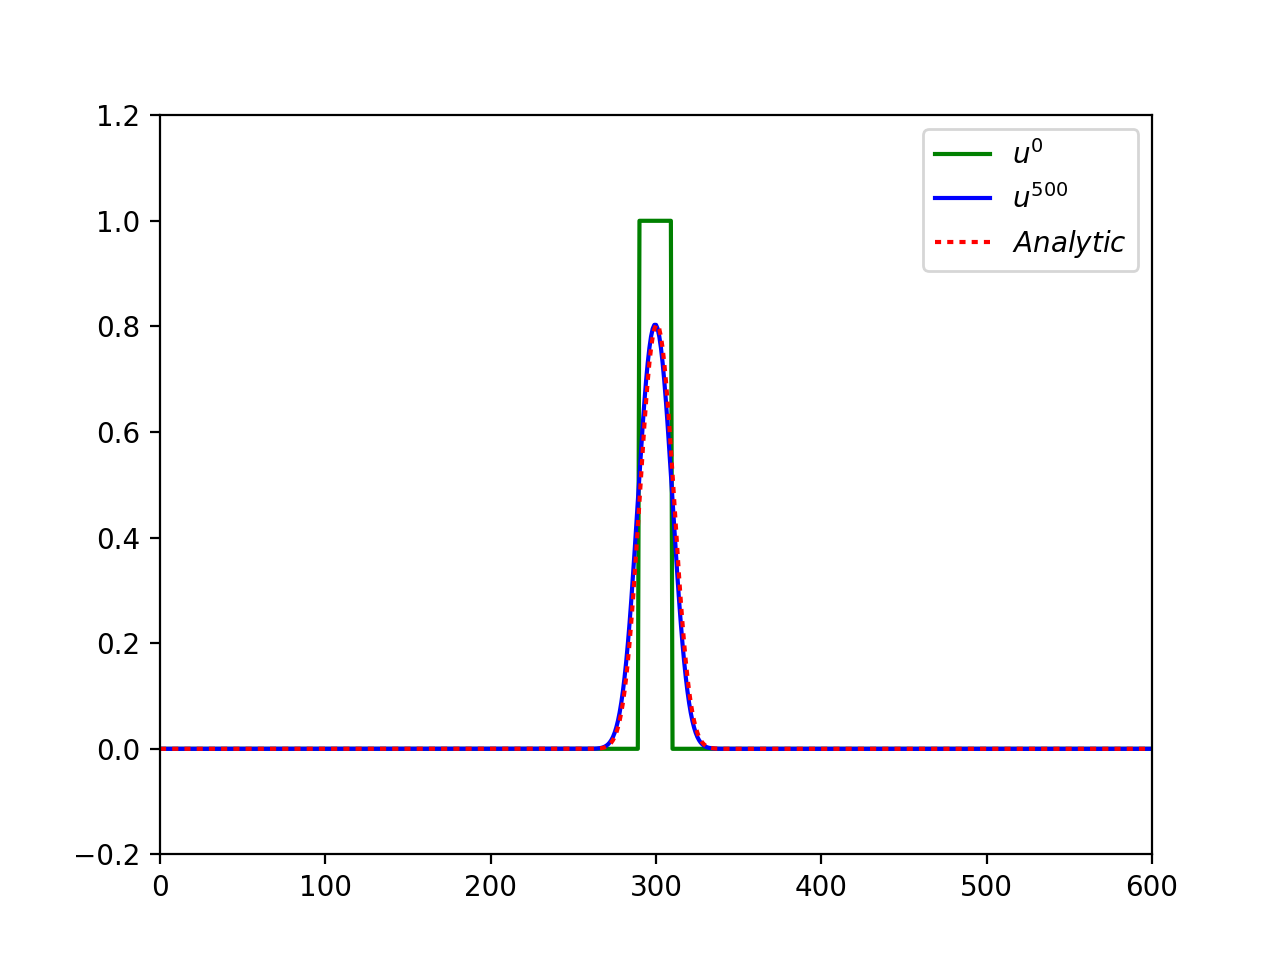

In [88]:
inline = True  # True for inline plot, False for interactive
if inline:
    %matplotlib notebook
else:
    %matplotlib
    
s = r'$u^{' + str(n_total) + r'}$'
plt.plot(x, u[0,:], 'g-',label = r'$u^0$')
plt.plot(x, u[-1,:], 'b-',label = s)
plt.xlim(x[0],x[-1])
umin, umax = np.min(u), np.max(u)
plt.ylim(umin-0.2, umax+0.2)

# Create actual solution for comparision

# Solution around x_tilde = 0, where x_tilde = x - (nx/2)dx

t_final = n_total*dt # final time

arg1 = (x*1000 - (dx/2.0)*(nx + width))/(2*np.sqrt(K*t_final))
arg2 = (x*1000 - (dx/2.0)*(nx - width))/(2*np.sqrt(K*t_final))

from scipy.special import erf

u_analytic = (erf(-arg1) - erf(-arg2))/2.0

plt.plot(x, u_analytic, 'r:', label = r'$Analytic$')

plt.legend((r'$u^0$', s, r'$Analytic$'), loc = 0)
plt.show()

### Note: The analytic solution is given by

$u(x,t) = \dfrac{1}{2}\text{erf}\Big(-\dfrac{x-\frac{\Delta{x}}{2}(nx+w)}{2\sqrt{Kt~}}\Big)-\dfrac{1}{2}\text{erf}\Big(-\dfrac{x-\frac{\Delta{x}}{2}(nx-w)}{2\sqrt{Kt~}}\Big)$

where

$\text{erf}(z) = \dfrac{2}{\sqrt{\pi}}\int_0^z e^{-w^2}dw$